# Análise Exploratória do Dataset `car_price_dataset`
Este notebook explora o conjunto de dados de preços de carros do Kaggle, armazenado no banco `kaggle_data`.

**Passos que seguiremos:**
1. Carregamento dos dados 🚀
2. Exploração inicial 🔍
3. Estatísticas descritivas 📊
4. Limpeza e tratamento de dados 🛠
5. Visualizações 📈
6. Exportação dos dados limpos 💾


In [0]:
# Selecionando o banco de dados Kaggle
spark.sql("USE kaggle_data")

# Carregando a tabela no PySpark DataFrame
df = spark.sql("SELECT * FROM kaggle_data.car_price_dataset")

# Exibir os primeiros registros
df.show(10)


+----------+--------+----+-----------+---------+--------------+-------+-----+-----------+-----+
|     Brand|   Model|Year|Engine_Size|Fuel_Type|  Transmission|Mileage|Doors|Owner_Count|Price|
+----------+--------+----+-----------+---------+--------------+-------+-----+-----------+-----+
|       Kia|     Rio|2020|        4.2|   Diesel|        Manual| 289944|    3|          5| 8501|
| Chevrolet|  Malibu|2012|        2.0|   Hybrid|     Automatic|   5356|    2|          3|12092|
|  Mercedes|     GLA|2020|        4.2|   Diesel|     Automatic| 231440|    4|          2|11171|
|      Audi|      Q5|2023|        2.0| Electric|        Manual| 160971|    2|          1|11780|
|Volkswagen|    Golf|2003|        2.6|   Hybrid|Semi-Automatic| 286618|    3|          3| 2867|
|    Toyota|   Camry|2007|        2.7|   Petrol|     Automatic| 157889|    4|          4| 7242|
|     Honda|   Civic|2010|        3.4| Electric|     Automatic| 139584|    3|          1|11208|
|       Kia|Sportage|2001|        4.7| E

In [0]:
# Verificando a estrutura das colunas
df.printSchema()


root
 |-- Brand: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Engine_Size: double (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Mileage: long (nullable = true)
 |-- Doors: long (nullable = true)
 |-- Owner_Count: long (nullable = true)
 |-- Price: long (nullable = true)



In [0]:
# Estatísticas descritivas do dataset
df.describe().show()


+-------+----------+--------+-----------------+------------------+---------+--------------+-----------------+------------------+------------------+------------------+
|summary|     Brand|   Model|             Year|       Engine_Size|Fuel_Type|  Transmission|          Mileage|             Doors|       Owner_Count|             Price|
+-------+----------+--------+-----------------+------------------+---------+--------------+-----------------+------------------+------------------+------------------+
|  count|     10000|   10000|            10000|             10000|    10000|         10000|            10000|             10000|             10000|             10000|
|   mean|      NULL|    NULL|        2011.5437|3.0005599999999966|     NULL|          NULL|      149239.1118|            3.4971|            2.9911|         8852.9644|
| stddev|      NULL|    NULL|6.897698756455915|1.1493240539456648|     NULL|          NULL|86322.34895733779|1.1100967622158642|1.4226816904421145|3112.5968102892334

In [0]:
df.select("Price").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+-----+
|summary|Price|
+-------+-----+
|  count|10000|
|    min| 2000|
|    25%| 6644|
|    50%| 8858|
|    75%|11086|
|    max|18301|
+-------+-----+



In [0]:
from pyspark.sql.functions import col, sum

# Contar valores nulos por coluna
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


+-----+-----+----+-----------+---------+------------+-------+-----+-----------+-----+
|Brand|Model|Year|Engine_Size|Fuel_Type|Transmission|Mileage|Doors|Owner_Count|Price|
+-----+-----+----+-----------+---------+------------+-------+-----+-----------+-----+
|    0|    0|   0|          0|        0|           0|      0|    0|          0|    0|
+-----+-----+----+-----------+---------+------------+-------+-----+-----------+-----+



In [0]:
df = df.dropna()


In [0]:
from pyspark.sql.types import IntegerType, DoubleType

df = df.withColumn("Year", df["Year"].cast(IntegerType()))
df = df.withColumn("Engine_Size", df["Engine_Size"].cast(DoubleType()))
df = df.withColumn("Mileage", df["Mileage"].cast(IntegerType()))
df = df.withColumn("Doors", df["Doors"].cast(IntegerType()))
df = df.withColumn("Owner_Count", df["Owner_Count"].cast(IntegerType()))
df = df.withColumn("Price", df["Price"].cast(DoubleType()))


In [0]:
df.select("Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price").describe().show()


+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|summary|             Year|       Engine_Size|          Mileage|             Doors|       Owner_Count|             Price|
+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|  count|            10000|             10000|            10000|             10000|             10000|             10000|
|   mean|        2011.5437|3.0005599999999966|      149239.1118|            3.4971|            2.9911|         8852.9644|
| stddev|6.897698756455915|1.1493240539456648|86322.34895733779|1.1100967622158642|1.4226816904421145|3112.5968102892334|
|    min|             2000|               1.0|               25|                 2|                 1|            2000.0|
|    max|             2023|               5.0|           299947|                 5|                 5|           18301.0|
+-------+---------------

In [0]:
df.select("Price").summary("count", "min", "25%", "50%", "75%", "max", "mean", "stddev").show()


+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|             10000|
|    min|            2000.0|
|    25%|            6644.0|
|    50%|            8858.0|
|    75%|           11086.0|
|    max|           18301.0|
|   mean|         8852.9644|
| stddev|3112.5968102892334|
+-------+------------------+



In [0]:
df = df.fillna({"Engine_Size": 1.5, "Doors": 4, "Owner_Count": 1})


In [0]:
df.groupBy("Year").count().orderBy("Year", ascending=False).show(10)


+----+-----+
|Year|count|
+----+-----+
|2023|  448|
|2022|  397|
|2021|  391|
|2020|  415|
|2019|  421|
|2018|  425|
|2017|  433|
|2016|  395|
|2015|  426|
|2014|  417|
+----+-----+
only showing top 10 rows


In [0]:
df.groupBy("Year").avg("Price").orderBy("Year", ascending=False).show(10)


+----+------------------+
|Year|        avg(Price)|
+----+------------------+
|2023|12169.470982142857|
|2022|12067.690176322418|
|2021|11637.813299232737|
|2020|11495.284337349398|
|2019|11132.722090261283|
|2018| 10939.19294117647|
|2017|10343.757505773672|
|2016|           10177.6|
|2015| 9896.774647887323|
|2014| 9587.455635491608|
+----+------------------+
only showing top 10 rows


In [0]:
df_pandas = df.toPandas()


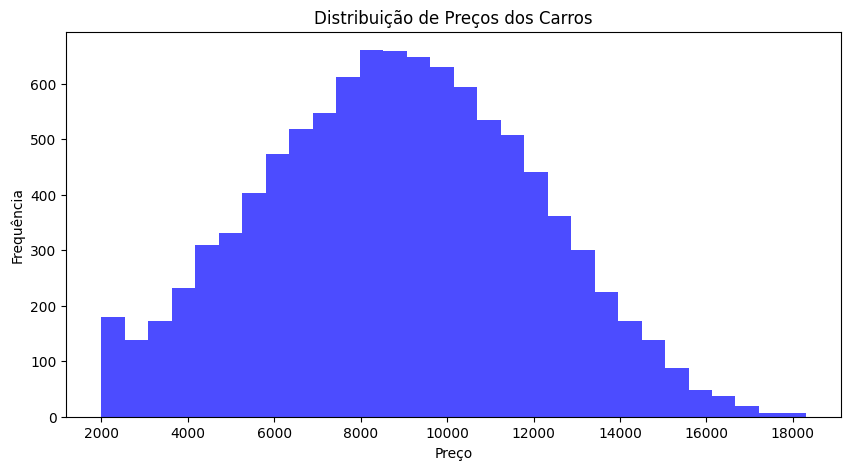

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_pandas["Price"], bins=30, color="blue", alpha=0.7)
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.title("Distribuição de Preços dos Carros")
plt.show()


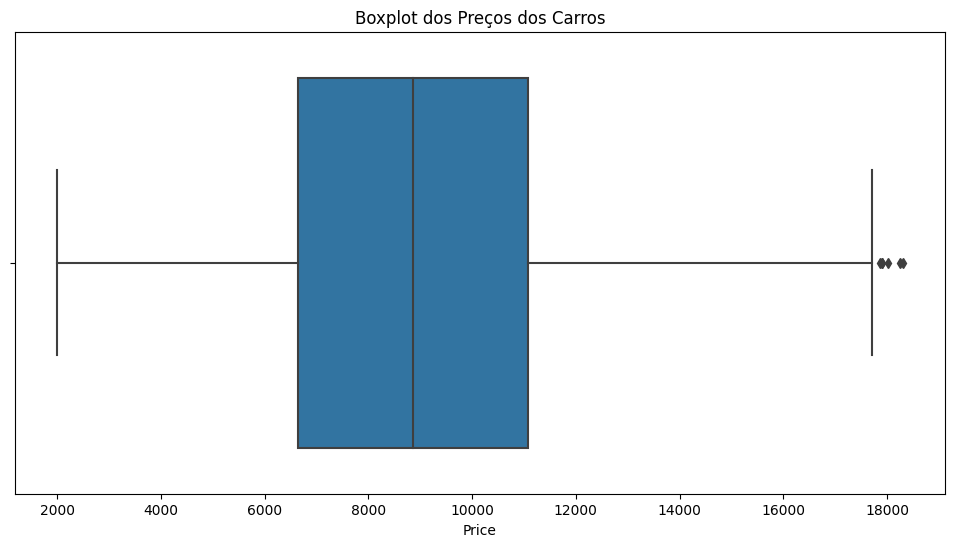

In [0]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x=df_pandas["Price"])
plt.title("Boxplot dos Preços dos Carros")
plt.show()


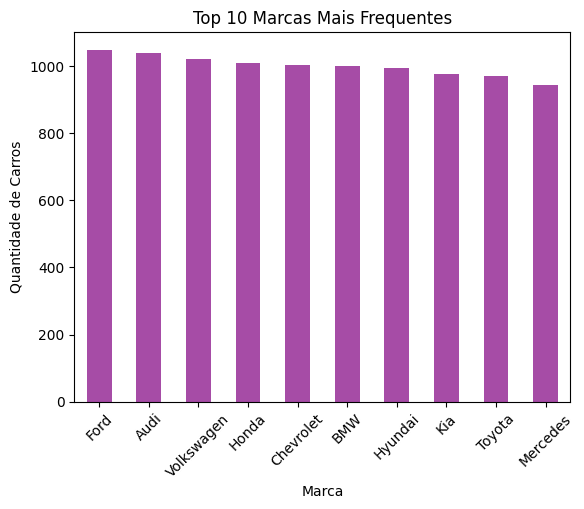

In [0]:
df_pandas["Brand"].value_counts().head(10).plot(kind="bar", color="purple", alpha=0.7)
plt.xlabel("Marca")
plt.ylabel("Quantidade de Carros")
plt.title("Top 10 Marcas Mais Frequentes")
plt.xticks(rotation=45)
plt.show()


In [0]:
Q1 = df_pandas["Price"].quantile(0.25)
Q3 = df_pandas["Price"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os dados sem outliers
df_limpo = df_pandas[(df_pandas["Price"] >= limite_inferior) & (df_pandas["Price"] <= limite_superior)]


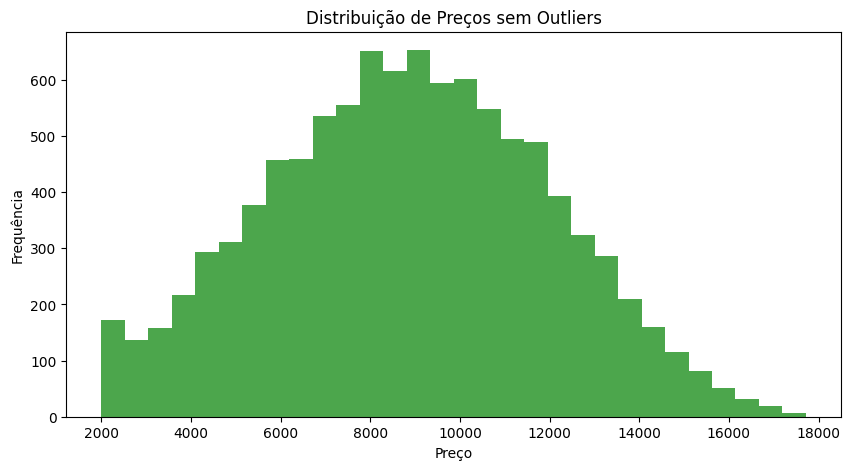

In [0]:
plt.figure(figsize=(10, 5))
plt.hist(df_limpo["Price"], bins=30, color="green", alpha=0.7)
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.title("Distribuição de Preços sem Outliers")
plt.show()
